# Lab 4

[[0.01951305]]
[10.03124307]
[[2.85592945]]


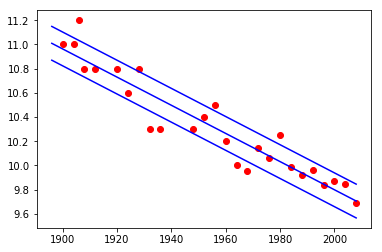

In [3]:
from IPython.display import IFrame
import pylab as plt
%matplotlib inline
import urllib
import numpy as np

# Load data
data = np.loadtxt('../olympic100m.txt',delimiter=',')
x = data[1:,0][:,None]
t = data[1:,1][:,None]

# Implement the maximum likelihood estimator for the parameters w and σ^2 of the linear model
X = np.hstack((np.ones_like(x),x))
w = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,t))
# w is identical to the value from minimising the loss, so yay
#print(w)

Xw = np.dot(X,w)
sigmasq = np.dot((t-Xw).T,(t-Xw)) / len(x)
print(sigmasq)

# Plot the training data, the predictive mean (i.e. Xtestw, the polynomial function)
testx = np.linspace(1896,2008,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)

plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

# On top of your previous plot add dashed lines to show ±σ, i.e. a line at Xtest*w + σ and one at Xtestw − σ
plt.plot(testx,testt + np.sqrt(sigmasq), 'b')
plt.plot(testx,testt - np.sqrt(sigmasq), 'b')
# Should the lines be this close?

# Plot the predictive density for the 2016 Olympics
# (your x axis will be winning time, t, and your y axis p(t)).
# I.e. a Gaussian pdf with mean wT x2016 and variance σ2.
miu = np.array([1, 1980]).dot(w)
print(miu)
density = 1/np.sqrt(2*np.pi*sigmasq)
print(density)

plt.figure()
#plt.plot(x2,t2,'ro')